In [13]:
%%capture
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from mlaut.benchmarking.data import RAMDataset
from sklearn import datasets
from mlaut.highlevel.tasks import TabClassifTask, TabRegrTask

from mlaut.benchmarking.results import HDDResults, RAMResults
from mlaut.highlevel.strategies import TabClassifStrategy
from mlaut.model_selection import SingleSplit
from mlaut.benchmarking.orchestration import Orchestrator

from sklearn import linear_model
from mlaut.strategies.baseline import BaselineClassifierStrategy, BaselineRegressorStrategy
from mlaut.strategies.bayes import GaussianNaiveBayesStrategy, BernoulliNaiveBayesStrategy
from mlaut.strategies.cluster import KNeighboursStrategy
from mlaut.strategies.decision_trees import DecisionTreeClassifierStrategy, DecisionTreeRegressorStrategy
from mlaut.strategies.ensemble import (RandomForestClassifierStrategy,
                                       RandomForestRegressorStrategy,
                                       GradientBoostingClassifierStrategy,
                                       GradientBoostingRegressorStrategy, 
                                       BaggingClassifierStrategy, 
                                       BaggingRegressorStrategy)
from mlaut.strategies.glm import (LinearRegressonStrategy, 
                                  RidgeRegressionStrategy, 
                                  LassoStrategy, 
                                  LassoLarsStrategy, 
                                  LogisticRegressionStrategy, 
                                  BayesianRidgeStrategy, 
                                  PassiveAggressiveClassifierStrategy)
from mlaut.strategies.svm import SVMStrategy, SVRStrategy
from mlaut.strategies.neural_networks import KerasClassificationStrategy, KerasRegressionStrategy
from mlaut.benchmarking.evaluation import Evaluator

# Benchmark strategies

In [2]:
iris = datasets.load_iris()
wine = datasets.load_wine()

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['target'] = iris.target

wine_pd = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_pd['target'] = wine.target

datasets = ([RAMDataset(iris_pd, name='iris'),
            RAMDataset(wine_pd, name='wine')])

tasks = [TabClassifTask(target="target") for _ in range(len(datasets))]


strategies = [
    BaselineClassifierStrategy, 
    GaussianNaiveBayesStrategy, 
    KNeighboursStrategy,
    DecisionTreeClassifierStrategy, 
    KerasClassificationStrategy
]

results = HDDResults(path='results')

orchestrator = Orchestrator(datasets=datasets,
                            tasks=tasks,  
                            strategies=strategies, 
                            cv=SingleSplit(), 
                            results=results,
                            log_file_path=None)

orchestrator.fit_predict(save_fitted_strategies=True, overwrite_predictions=True)

INFO:root:********* Fitting BaselineClassifier
INFO:root:********* Fitting GaussianNaiveBayes
INFO:root:********* Fitting KNeighbours
INFO:root:********* Fitting DecisionTreeClassifier
INFO:root:********* Fitting KerasClassifier4Layers


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


112/112 [==============================] - 0s 2ms/sample - loss: 0.2160 - acc: 0.3661


INFO:root:********* Fitting BaselineClassifier
INFO:root:********* Fitting GaussianNaiveBayes
INFO:root:********* Fitting KNeighbours
INFO:root:********* Fitting DecisionTreeClassifier
INFO:root:********* Fitting KerasClassifier4Layers


133/133 [==============================] - 0s 1ms/sample - loss: 0.4597 - acc: 0.2932


## Evaluate results

In [3]:
from mlaut.benchmarking.evaluation import Evaluator
from mlaut.benchmarking.metrics import PairwiseMetric
from sklearn.metrics import accuracy_score

In [4]:
evaluator = Evaluator(results)

metric = PairwiseMetric(func=accuracy_score, name='accuracy')
metrics_by_strategy = evaluator.evaluate(metric=metric)
metrics_by_strategy

,strategy,accuracy_mean,accuracy_stderr
0,BaselineClassifier,0.397368,0.077106
1,DecisionTreeClassifier,0.895906,0.045674
2,GaussianNaiveBayes,0.988889,0.011111
3,KNeighbours,0.809064,0.049240
4,KerasClassifier4Layers,0.280117,0.070603


In [5]:
evaluator.rank()

,strategy,accuracy_mean_rank
0,BaselineClassifier,4.0
1,DecisionTreeClassifier,2.5
2,GaussianNaiveBayes,1.0
3,KNeighbours,2.5
4,KerasClassifier4Layers,5.0


In [6]:
df, df_pivot = evaluator.t_test()
df_pivot

BaselineClassifier           DecisionTreeClassifier  \
                                   t_stat     p_val                 t_stat   
BaselineClassifier               0.000000  1.000000              -9.674859   
DecisionTreeClassifier           9.674859  0.010515               0.000000   
GaussianNaiveBayes              51.803722  0.000372               1.766122   
KNeighbours                      2.500569  0.129564              -0.503502   
KerasClassifier4Layers          -3.277978  0.081808              -9.834252   

                                 GaussianNaiveBayes           KNeighbours  \
                           p_val             t_stat     p_val      t_stat   
BaselineClassifier      0.010515         -51.803722  0.000372   -2.500569   
DecisionTreeClassifier  1.000000          -1.766122  0.219415    0.503502   
GaussianNaiveBayes      0.219415           0.000000  1.000000    1.089883   
KNeighbours             0.664594          -1.089883  0.389577    0.000000   
KerasClassifier4Layers  0.010182         -18.969947  0.002767   -3.140261   

                                 KerasClassifier4Layers            
                           p_val                 t_stat     p_val  
BaselineClassifier      0.129564               3.277978  0.081808  
DecisionTreeClassifier  0.664594               9.834252  0.010182  
GaussianNaiveBayes      0.389577              18.969947  0.002767  
KNeighbours             1.000000               3.140261  0.088198  
KerasClassifier4Layers  0.088198               0.000000  1.000000

In [7]:
evaluator.t_test_with_bonferroni_correction()

,BaselineClassifier,DecisionTreeClassifier,GaussianNaiveBayes,KNeighbours,KerasClassifier4Layers
BaselineClassifier,False,False,True,False,False
DecisionTreeClassifier,False,False,False,False,False
GaussianNaiveBayes,True,False,False,False,False
KNeighbours,False,False,False,False,False
KerasClassifier4Layers,False,False,False,False,False


In [8]:
df, df_pivot = evaluator.sign_test()
df_pivot

estimator_2,BaselineClassifier,DecisionTreeClassifier,GaussianNaiveBayes,KNeighbours,KerasClassifier4Layers
estimator_1,,,,,
BaselineClassifier,0.5,0.5,0.5,0.5,0.5
DecisionTreeClassifier,0.5,0.5,0.5,1.0,0.5
GaussianNaiveBayes,0.5,0.5,0.5,0.5,0.5
KNeighbours,0.5,1.0,0.5,0.5,0.5
KerasClassifier4Layers,0.5,0.5,0.5,0.5,0.5


In [9]:
df, df_pivot = evaluator.ranksum_test()
df_pivot

BaselineClassifier           DecisionTreeClassifier  \
                                   t_stat     p_val                 t_stat   
BaselineClassifier               0.000000  1.000000              -1.549193   
DecisionTreeClassifier           1.549193  0.121335               0.000000   
GaussianNaiveBayes               1.549193  0.121335               1.549193   
KNeighbours                      1.549193  0.121335               0.000000   
KerasClassifier4Layers          -1.549193  0.121335              -1.549193   

                                 GaussianNaiveBayes           KNeighbours  \
                           p_val             t_stat     p_val      t_stat   
BaselineClassifier      0.121335          -1.549193  0.121335   -1.549193   
DecisionTreeClassifier  1.000000          -1.549193  0.121335    0.000000   
GaussianNaiveBayes      0.121335           0.000000  1.000000    1.549193   
KNeighbours             1.000000          -1.549193  0.121335    0.000000   
KerasClassifier4Layers  0.121335          -1.549193  0.121335   -1.549193   

                                 KerasClassifier4Layers            
                           p_val                 t_stat     p_val  
BaselineClassifier      0.121335               1.549193  0.121335  
DecisionTreeClassifier  1.000000               1.549193  0.121335  
GaussianNaiveBayes      0.121335               1.549193  0.121335  
KNeighbours             1.000000               1.549193  0.121335  
KerasClassifier4Layers  0.121335               0.000000  1.000000

In [10]:
df, df_pivot = evaluator.friedman_test()
df_pivot

,statistic,p_value
0,7.6,0.10738


In [11]:
evaluator.nemenyi()

,BaselineClassifier,DecisionTreeClassifier,GaussianNaiveBayes,KNeighbours,KerasClassifier4Layers
BaselineClassifier,-1.000000,0.912540,0.415938,0.912540,0.979393
DecisionTreeClassifier,0.912540,-1.000000,0.912540,1.000000,0.604451
GaussianNaiveBayes,0.415938,0.912540,-1.000000,0.912540,0.136852
KNeighbours,0.912540,1.000000,0.912540,-1.000000,0.604451
KerasClassifier4Layers,0.979393,0.604451,0.136852,0.604451,-1.000000


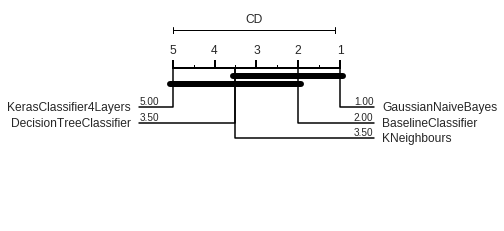

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1ce4cd93c8>)

In [16]:
evaluator.plot_critical_difference_diagram()